In [64]:
import os
import pandas as pd
import sql as gd

In [80]:
# flights_faso = gd.get_data('SELECT * FROM flights_faso')
# flights_faso.head()
flights_fs = gd.get_data('SELECT * FROM flights_fs')
flights_fs

/opt/homebrew/Caskroom/miniconda/base/envs/sql-practice/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,distance,cancelled,diverted
0,2012-10-01,933.0,900,33.0,1305.0,1205,60.0,AA,N320AA,1,JFK,LAX,317.0,2475.0,0,0
1,2012-10-02,906.0,900,6.0,1200.0,1205,-5.0,AA,N319AA,1,JFK,LAX,328.0,2475.0,0,0
2,2012-10-03,900.0,900,0.0,1225.0,1205,20.0,AA,N319AA,1,JFK,LAX,340.0,2475.0,0,0
3,2012-10-04,853.0,900,-7.0,1205.0,1205,0.0,AA,N325AA,1,JFK,LAX,336.0,2475.0,0,0
4,2012-10-05,853.0,900,-7.0,1236.0,1205,31.0,AA,N325AA,1,JFK,LAX,368.0,2475.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325773,2012-11-10,824.0,824,0.0,1346.0,1220,NaN,YV,N518LR,3733,ELP,ORD,NaN,1236.0,0,1
325774,2012-11-10,1045.0,1049,-4.0,1433.0,1216,NaN,YV,N522LR,3734,MCI,ORD,NaN,403.0,0,1
325775,2012-11-23,834.0,840,-6.0,1029.0,900,NaN,YV,N922FJ,2819,PHX,LGB,NaN,355.0,0,1
325776,2012-11-27,1511.0,1515,-4.0,1753.0,1643,NaN,YV,N909FJ,2744,AUS,PHX,NaN,872.0,0,1


In [76]:
# getting lat and lon of selected airports from airports table in database

points = gd.get_data("SELECT faa, lat,lon FROM airports WHERE faa in ('JFK', 'IAD', 'LGA', 'DCA', 'PHX', 'ORD', 'LAX')")
points
         


/opt/homebrew/Caskroom/miniconda/base/envs/sql-practice/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,faa,lat,lon
0,PHX,33.434299,-112.012001
1,LAX,33.942501,-118.407997
2,DCA,38.852100,-77.037697
3,LGA,40.777199,-73.872597
4,IAD,38.944500,-77.455803
5,JFK,40.639801,-73.778900
6,ORD,41.978600,-87.904800


In [46]:
import requests

url = "https://meteostat.p.rapidapi.com/point/daily"

querystring = {"lat": "40.77719879","lon": "-73.87259674","start":"2012-10-29","end":"2012-10-29"}
# https://meteostat.p.rapidapi.com/point/daily?lat=43.6667&lon=-79.4&start=2020-01-01&end=2020-01-31&alt=184'
headers = {
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com",
	"X-RapidAPI-Key": ""
}
r = requests.request("GET", url, headers=headers, params=querystring)

print(r.text)
type(r)

{"meta":{"generated": "2022-05-06 08:32:48", "stations": ["KNYC0", "72502", "KTEB0", "74486"]},"data":[{"date":"2012-10-29","tavg":14.5,"tmin":12.2,"tmax":17.8,"prcp":15.2,"snow":0.0,"wdir":35.0,"wspd":54.7,"wpgt":null,"pres":null,"tsun":null}]}


requests.models.Response

In [47]:
import json

print(json.dumps(r.json(), indent=2))

{
  "meta": {
    "generated": "2022-05-06 08:32:48",
    "stations": [
      "KNYC0",
      "72502",
      "KTEB0",
      "74486"
    ]
  },
  "data": [
    {
      "date": "2012-10-29",
      "tavg": 14.5,
      "tmin": 12.2,
      "tmax": 17.8,
      "prcp": 15.2,
      "snow": 0.0,
      "wdir": 35.0,
      "wspd": 54.7,
      "wpgt": null,
      "pres": null,
      "tsun": null
    }
  ]
}


In [116]:
# Set the url
url = "https://meteostat.p.rapidapi.com/point/daily"

# Set locations

points = {"DCA": ["38.852100", "-77.037697"],
	     "LGA": ["40.777199", "-73.872597"],
	     "IAD":	["38.944500", "-77.455803"],
	     "JFK":	["40.639801", "-73.778900"],
         "MDW":	["41.785999", "-87.752403"],
         "ORD":	["41.9786",	"-87.9048"],
         "LAX":	["33.94250107",	"-118.4079971"],
         "PHX":	["33.43429946899414", "-112.01200103759766"]}


# Create empty dataframe, will be used to append each location's weather data
weather_df = pd.DataFrame([])
# Loop through all locations
for key, value in points.items():
    # Create final url
    # Request data from url
    querystring = {"lat":value[0], "lon":value[1], "start":"2012-10-01", "end":"2012-11-29"}
    # https://meteostat.p.rapidapi.com/point/daily?lat=43.6667&lon=-79.4&start=2020-01-01&end=2020-01-31&alt=184'
    headers = {
    "X-RapidAPI-Host": "meteostat.p.rapidapi.com",
    "X-RapidAPI-Key": "06cc1bc58bmsh6b0e697965add32p1e5320jsnf3103b779dfa"
    }
    r = requests.request("GET", url, headers=headers, params=querystring)

    if r.status_code != 200:
        print(r.json())
        break
    
    import time 
    time.sleep(0.5) #uncomment if you run into a query limit
    
    # Decode repsonse with json decoder
    weather_temp = r.json()

    # Flatten json response
    weather_temp_df = pd.json_normalize(weather_temp, 
                                        sep="_", 
                                        record_path="data", 
                                        errors='ignore')

    
    weather_temp_df['location'] = [key] * 60
    
    # concatenate dataframes
    weather_df = pd.concat([weather_df, weather_temp_df], ignore_index=True)

# Print final dataset weather_df
weather_df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,location
0,2012-10-01,16.9,12.2,22.2,0.0,0.0,NaN,5.8,None,1014.0,None,DCA
1,2012-10-02,20.3,18.3,22.2,10.9,0.0,NaN,7.9,None,1013.2,None,DCA
2,2012-10-03,23.8,21.1,27.8,0.0,0.0,NaN,4.7,None,1017.6,None,DCA
3,2012-10-04,23.9,18.9,27.2,0.3,0.0,NaN,7.6,None,1019.9,None,DCA
4,2012-10-05,21.8,16.1,28.3,0.0,0.0,NaN,7.9,None,1018.7,None,DCA
...,...,...,...,...,...,...,...,...,...,...,...,...
475,2012-11-25,20.1,13.9,27.8,0.0,None,NaN,5.0,None,1011.1,None,PHX
476,2012-11-26,18.8,12.8,26.7,0.0,None,NaN,6.1,None,1014.5,None,PHX
477,2012-11-27,19.9,12.8,28.9,0.0,None,NaN,5.8,None,1017.8,None,PHX
478,2012-11-28,19.9,13.9,26.7,0.0,None,NaN,6.1,None,1017.6,None,PHX


In [280]:

flights_selected = flights_fs[['flight_date', 'dep_delay', 'origin', 'dest', 'cancelled', 'diverted']]
weather_df_selected = weather_df[['date', 'tavg', 'tmin', 'tmax', 'wspd', 'pres', 'location']]



In [281]:
weather_df_selected['date'] = weather_df_selected['date'].map(pd.to_datetime)
weather_df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      480 non-null    datetime64[ns]
 1   tavg      480 non-null    float64       
 2   tmin      480 non-null    float64       
 3   tmax      480 non-null    float64       
 4   wspd      480 non-null    float64       
 5   pres      448 non-null    float64       
 6   location  480 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 26.4+ KB


/var/folders/_k/3v2l6rmd5m3gnk2prt6lj__h0000gn/T/ipykernel_13894/2051981140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df_selected['date'] = weather_df_selected['date'].map(pd.to_datetime)


In [282]:
all_origin = flights_selected.merge(weather_df_selected, 
    left_on=['flight_date', 'origin'], right_on=['date', 'location'])
all_origin
# list_dates = ["2012-10-22","2012-10-23", "2012-10-24", "2012-10-25", "2012-10-26", "2012-10-27",  "2012-10-28", "2012-10-29", "2012-10-30", "2012-10-31", "2012-11-01", "2012-11-02"]
all_hit =all_origin.query('origin in ["JFK","IAD","LGA","DCA"] and date in ["2012-10-22","2012-10-23", "2012-10-24", "2012-10-25", "2012-10-26", "2012-10-27",  "2012-10-28", "2012-10-29", "2012-10-30", "2012-10-31", "2012-11-01", "2012-11-02"]')

In [207]:
# attemps with Sergio 
# flights_selected.origin.unique().tolist().isin(weather_df_selected.location.unique())
# type(flights_selected.origin.unique().tolist())
# pd.Series(flights_selected.origin.unique()).isin(weather_df_selected.location.unique())
# all_origin2.dropna(inplace=True)
# all_origin2.info()
# all_origin2

,flight_date,dep_delay,origin,dest,cancelled,diverted,date,tavg,tmin,tmax,wspd,location
0,2012-10-01,33.0,JFK,LAX,0,0,2012-10-01,17.1,12.2,22.2,18.4,JFK
1,2012-10-01,-5.0,JFK,LAX,0,0,2012-10-01,17.1,12.2,22.2,18.4,JFK
2,2012-10-01,-5.0,JFK,LAX,0,0,2012-10-01,17.1,12.2,22.2,18.4,JFK
3,2012-10-01,-7.0,JFK,LAX,0,0,2012-10-01,17.1,12.2,22.2,18.4,JFK
4,2012-10-01,-3.0,JFK,SFO,0,0,2012-10-01,17.1,12.2,22.2,18.4,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...
325773,2012-11-30,8.0,MDW,PHX,0,0,NaT,NaN,NaN,NaN,NaN,NaN
325774,2012-11-30,29.0,MDW,PHX,0,0,NaT,NaN,NaN,NaN,NaN,NaN
325775,2012-11-30,0.0,MDW,PHX,0,0,NaT,NaN,NaN,NaN,NaN,NaN
325776,2012-11-30,-1.0,MDW,PHX,0,0,NaT,NaN,NaN,NaN,NaN,NaN


In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.boxplot(total['truck_bday'])
# plt.scatter(x='dep_delay', y='wspd')
# all_hit2.plot(kind='scatter', x='dep_delay', y='wspd');
# X3 = all_hit[['dep_delay', 'wspd', 'cancelled', 'tavg', 'diverted' ]]
# sns.pairplot(X3);
all_hit.corr()

,dep_delay,cancelled,diverted,tavg,tmin,tmax,wspd,pres
dep_delay,1.000000,-0.005168,0.031778,-0.044133,-0.037353,-0.045912,0.067349,-0.055134
cancelled,-0.005168,1.000000,-0.017904,-0.436782,-0.301371,-0.448686,0.660052,-0.632967
diverted,0.031778,-0.017904,1.000000,0.019125,0.013251,0.018148,-0.016050,0.019476
tavg,-0.044133,-0.436782,0.019125,1.000000,0.881334,0.910928,-0.299503,0.850278
tmin,-0.037353,-0.301371,0.013251,0.881334,1.000000,0.631656,-0.163386,0.632733
tmax,-0.045912,-0.448686,0.018148,0.910928,0.631656,1.000000,-0.370052,0.857216
wspd,0.067349,0.660052,-0.016050,-0.299503,-0.163386,-0.370052,1.000000,-0.599231
pres,-0.055134,-0.632967,0.019476,0.850278,0.632733,0.857216,-0.599231,1.000000


In [382]:
all_hit

,flight_date,dep_delay,origin,dest,cancelled,diverted,date,tavg,tmin,tmax,wspd,pres,location
5573,2012-10-22,6.0,JFK,LAX,0,0,2012-10-22,15.8,10.6,20.6,18.7,1017.9,JFK
5574,2012-10-22,-11.0,JFK,LAX,0,0,2012-10-22,15.8,10.6,20.6,18.7,1017.9,JFK
5575,2012-10-22,-11.0,JFK,LAX,0,0,2012-10-22,15.8,10.6,20.6,18.7,1017.9,JFK
5576,2012-10-22,169.0,JFK,LAX,0,0,2012-10-22,15.8,10.6,20.6,18.7,1017.9,JFK
5577,2012-10-22,82.0,JFK,SFO,0,0,2012-10-22,15.8,10.6,20.6,18.7,1017.9,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154063,2012-11-02,82.0,DCA,CLT,0,0,2012-11-02,8.8,5.0,12.8,18.4,1009.5,DCA
154064,2012-11-02,-6.0,DCA,SFO,0,0,2012-11-02,8.8,5.0,12.8,18.4,1009.5,DCA
154065,2012-11-02,7.0,DCA,AUS,0,0,2012-11-02,8.8,5.0,12.8,18.4,1009.5,DCA
154066,2012-11-02,0.0,DCA,STL,0,0,2012-11-02,8.8,5.0,12.8,18.4,1009.5,DCA


<AxesSubplot:>

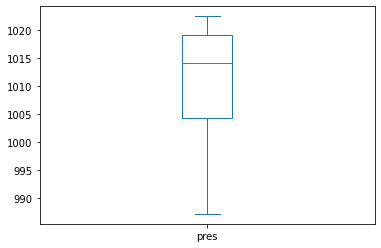

In [381]:
all_hit.plot(kind='box', x= 'cancelled', y= 'pres')

In [284]:
all_origin = pd.merge(flights_selected,weather_df_selected, 
    left_on=['flight_date', 'origin'], right_on=['date', 'location'])
all_not_hit =all_origin.query('origin in ["MDW","ORD","LAX","PHX"] and dest in ["MDW","ORD","LAX","PHX"] and date in ["2012-10-22","2012-10-23", "2012-10-24", "2012-10-25", "2012-10-26", "2012-10-27",  "2012-10-28", "2012-10-29", "2012-10-30", "2012-10-31", "2012-11-01", "2012-11-02"]')

In [285]:
all_not_hit.corr()

,dep_delay,cancelled,diverted,tavg,tmin,tmax,wspd,pres
dep_delay,1.000000,NaN,-0.000165,-0.065551,-0.071671,-0.072453,0.099498,0.005737
cancelled,NaN,1.000000,-0.003612,-0.044469,-0.039757,-0.040339,0.033416,0.012904
diverted,-0.000165,-0.003612,1.000000,-0.005188,0.005096,-0.007721,0.016633,0.011377
tavg,-0.065551,-0.044469,-0.005188,1.000000,0.933631,0.974606,-0.601424,-0.576825
tmin,-0.071671,-0.039757,0.005096,0.933631,1.000000,0.853806,-0.585767,-0.494199
tmax,-0.072453,-0.040339,-0.007721,0.974606,0.853806,1.000000,-0.618418,-0.577344
wspd,0.099498,0.033416,0.016633,-0.601424,-0.585767,-0.618418,1.000000,0.288502
pres,0.005737,0.012904,0.011377,-0.576825,-0.494199,-0.577344,0.288502,1.000000


In [289]:
# to join two times flights with weather to have wind speed of dest and origin both
query = """SELECT flight_date,
    dep_delay,
    arr_delay,
    cancelled,
    diverted,
    ff.origin,
    ff.dest,
    wdf1.wspd AS origin_wspd,
    wdf2.wspd AS dest_wspd,
    wdf1.tavg AS origin_tavg,
    wdf2.tavg AS dest_tavg
FROM flights_fs ff 
LEFT JOIN weather_df_fs wdf1
ON ff.flight_date= wdf1."date" 
AND ff.origin = wdf1."location"
LEFT JOIN weather_df_fs wdf2
ON ff.flight_date= wdf2."date"
AND ff.dest = wdf2."location";"""

all = gd.get_data(query)
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325778 entries, 0 to 325777
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   flight_date  325778 non-null  datetime64[ns]
 1   dep_delay    316017 non-null  float64       
 2   arr_delay    315328 non-null  float64       
 3   cancelled    325778 non-null  int64         
 4   diverted     325778 non-null  int64         
 5   origin       325778 non-null  object        
 6   dest         325778 non-null  object        
 7   origin_wspd  173778 non-null  float64       
 8   dest_wspd    173757 non-null  float64       
 9   origin_tavg  173778 non-null  float64       
 10  dest_tavg    173757 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 27.3+ MB


In [286]:
import numpy as np

all_both_hit =all.query('origin in ["JFK","IAD","LGA","DCA"] and flight_date in ["2012-10-22","2012-10-23", "2012-10-24", "2012-10-25", "2012-10-26", "2012-10-27",  "2012-10-28", "2012-10-29", "2012-10-30", "2012-10-31", "2012-11-01", "2012-11-02"]')
all_both_hit['wspd'] = \
    np.where(all_both_hit['dest_wspd'].isnull(),
    all_both_hit['origin_wspd'], all_both_hit['dest_wspd'])
all_both_hit.corr()

/var/folders/_k/3v2l6rmd5m3gnk2prt6lj__h0000gn/T/ipykernel_13894/2852192600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_both_hit['wspd'] = \


,dep_delay,arr_delay,cancelled,diverted,origin_wspd,dest_wspd,origin_tavg,dest_tavg,wspd
dep_delay,1.000000,0.896343,-0.005168,0.031778,0.067349,0.021542,-0.044133,-0.034982,0.068496
arr_delay,0.896343,1.000000,NaN,NaN,0.044392,0.036045,0.018144,0.025248,0.067198
cancelled,-0.005168,NaN,1.000000,-0.017904,0.660052,0.386240,-0.436782,-0.339593,0.616364
diverted,0.031778,NaN,-0.017904,1.000000,-0.016050,-0.003498,0.019125,0.019783,-0.010736
origin_wspd,0.067349,0.044392,0.660052,-0.016050,1.000000,0.339140,-0.299503,-0.289664,0.891317
dest_wspd,0.021542,0.036045,0.386240,-0.003498,0.339140,1.000000,-0.192823,-0.373122,1.000000
origin_tavg,-0.044133,0.018144,-0.436782,0.019125,-0.299503,-0.192823,1.000000,0.434912,-0.279933
dest_tavg,-0.034982,0.025248,-0.339593,0.019783,-0.289664,-0.373122,0.434912,1.000000,-0.373122
wspd,0.068496,0.067198,0.616364,-0.010736,0.891317,1.000000,-0.279933,-0.373122,1.000000


In [359]:
sum = all_both_hit.groupby('flight_date').sum().reset_index()
# calculate the percentage of the cancelled flights
all_both_hit['count'] = [1]* all_both_hit.shape[0]
sum_count = all_both_hit.groupby('flight_date').sum()
sum_count['cancelled_percentage'] = sum_count['cancelled'] / sum_count['count'] * 100
sum_count



,dep_delay,arr_delay,cancelled,diverted,origin_wspd,dest_wspd,origin_tavg,dest_tavg,wspd,count,cancelled_percentage
flight_date,,,,,,,,,,,
2012-10-22,8417.0,4111.0,8,4,11119.1,2279.1,15102.4,3365.1,11157.8,1026,0.779727
2012-10-23,1926.0,-5972.0,6,0,5744.1,1998.4,15769.4,3457.3,6570.6,988,0.607287
2012-10-24,780.0,-4161.0,1,0,6633.0,2840.1,16772.8,3827.2,8121.8,996,0.100402
2012-10-25,4970.0,1996.0,6,3,8009.4,3833.3,16798.8,3859.6,10217.1,1024,0.585938
2012-10-26,4892.0,-1315.0,6,2,6254.2,2091.8,17735.8,3152.1,7046.1,1021,0.587659
2012-10-27,2257.0,-2941.0,3,1,9324.4,1766.2,13076.4,2020.2,9380.7,770,0.389610
2012-10-28,12837.0,8483.0,131,1,25038.6,3449.4,13942.3,2507.3,23594.4,963,13.603323
2012-10-29,21.0,-143.0,1008,0,49382.1,5673.8,12620.9,2439.6,45066.1,1019,98.920510
2012-10-30,31.0,-305.0,947,0,24082.2,4252.3,8925.5,1970.1,23467.1,966,98.033126


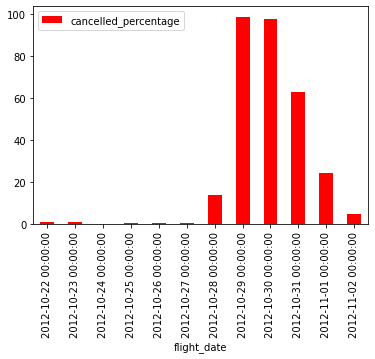

In [367]:
sum_count.reset_index().plot(kind='bar', x='flight_date', y='cancelled_percentage', color='red');

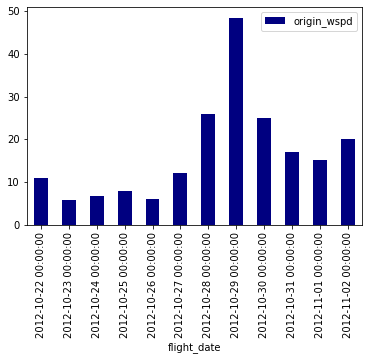

In [374]:
all_both_hit.groupby('flight_date').mean().reset_index() \
    .plot(kind='bar', x='flight_date', y='origin_wspd', color='navy');

# all_both_hit.groupby('flight_date').sum().reset_index() \
    # .plot(kind='bar', x='flight_date', y='cancelled', color='red');


In [364]:
all_not_hit['count'] = [1]* all_not_hit.shape[0]
sum_count_not_hit = all_not_hit.groupby('flight_date').sum()
sum_count_not_hit['cancelled_percentage'] = sum_count_not_hit['cancelled'] / sum_count_not_hit['count'] * 100
sum_count_not_hit

/var/folders/_k/3v2l6rmd5m3gnk2prt6lj__h0000gn/T/ipykernel_13894/3290194634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_not_hit['count'] = [1]* all_not_hit.shape[0]


,dep_delay,cancelled,diverted,tavg,tmin,tmax,wspd,pres,count,cancelled_percentage
flight_date,,,,,,,,,,
2012-10-22,4196.0,0,2,2872.2,2344.2,3482.1,1627.7,150884.2,149,0.000000
2012-10-23,1006.0,0,0,2806.0,2294.8,3325.4,1630.8,145759.0,144,0.000000
2012-10-24,737.0,1,0,3032.6,2290.8,3654.4,2430.4,149922.7,148,0.675676
2012-10-25,2554.0,0,0,3107.5,2019.8,4033.5,2955.6,140825.8,151,0.000000
2012-10-26,1489.0,0,0,2628.2,1663.7,3524.6,1522.4,151612.4,149,0.000000
2012-10-27,601.0,1,0,2082.5,1338.3,2943.3,1402.6,128052.3,126,0.793651
2012-10-28,957.0,2,0,2527.1,1695.0,3519.9,1592.5,152531.7,150,1.333333
2012-10-29,810.0,3,1,2320.0,1613.5,3169.0,1876.4,151760.8,149,2.013423
2012-10-30,1403.0,5,0,2088.0,1509.5,2715.7,2036.5,86103.0,137,3.649635


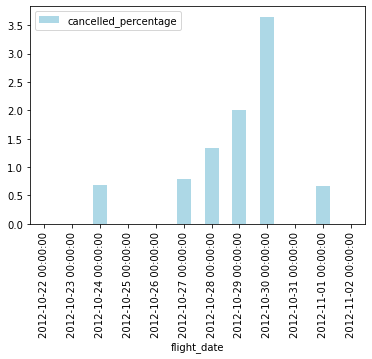

In [368]:
sum_count_not_hit.reset_index().plot(kind='bar', x='flight_date', y='cancelled_percentage', color='lightblue');

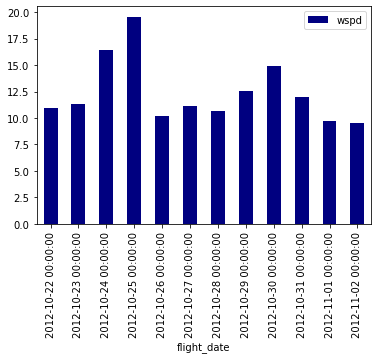

In [373]:
all_not_hit.groupby('flight_date').mean().reset_index() \
    .plot(kind='bar', x='flight_date', y='wspd', color='navy');

# all_not_hit.groupby('flight_date').sum().reset_index() \
    # .plot(kind='bar', x='flight_date', y='cancelled', color='red');

In [385]:
no_storm =all_origin.query('origin in ["JFK","IAD","LGA","DCA"] and date not in ["2012-10-22","2012-10-23", "2012-10-24", "2012-10-25", "2012-10-26", "2012-10-27",  "2012-10-28", "2012-10-29", "2012-10-30", "2012-10-31", "2012-11-01", "2012-11-02"]')
no_storm.corr()

,dep_delay,cancelled,diverted,tavg,tmin,tmax,wspd,pres
dep_delay,1.000000,0.042075,0.008787,0.042661,0.044649,0.035452,-0.004593,-0.033649
cancelled,0.042075,1.000000,-0.004841,-0.061217,-0.039270,-0.077674,0.138343,-0.097939
diverted,0.008787,-0.004841,1.000000,0.003204,-0.000314,0.004890,-0.009349,-0.006449
tavg,0.042661,-0.061217,0.003204,1.000000,0.948765,0.951776,-0.195780,-0.360246
tmin,0.044649,-0.039270,-0.000314,0.948765,1.000000,0.827971,-0.091735,-0.380796
tmax,0.035452,-0.077674,0.004890,0.951776,0.827971,1.000000,-0.266441,-0.293586
wspd,-0.004593,0.138343,-0.009349,-0.195780,-0.091735,-0.266441,1.000000,-0.283542
pres,-0.033649,-0.097939,-0.006449,-0.360246,-0.380796,-0.293586,-0.283542,1.000000


In [387]:
no_storm['count'] = [1]* no_storm.shape[0]
sum_co = no_storm.groupby('flight_date').sum().reset_index()
sum_co['cancelled_percentage'] = sum_co['cancelled'] / sum_co['count'] * 100
sum_co


/var/folders/_k/3v2l6rmd5m3gnk2prt6lj__h0000gn/T/ipykernel_13894/4051586399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_storm['count'] = [1]* no_storm.shape[0]


,flight_date,dep_delay,cancelled,diverted,tavg,tmin,tmax,wspd,pres,count,cancelled_percentage
0,2012-10-01,5824.0,8,2,16808.8,10772.2,22842.1,11873.7,1045262.8,1032,0.775194
1,2012-10-02,7661.0,8,3,18486.6,16863.5,21033.7,8020.9,1010464.1,996,0.803213
2,2012-10-03,12056.0,32,0,21045.8,18386.0,25027.8,4862.0,789713.8,996,3.212851
3,2012-10-04,14028.0,10,2,22541.1,18324.4,25924.2,6240.3,1047092.9,1027,0.973710
4,2012-10-05,6193.0,10,0,21281.9,15036.9,27571.4,9312.4,1044973.6,1027,0.973710
5,2012-10-06,999.0,7,0,14433.2,9099.4,19794.4,14280.8,788578.0,779,0.898588
6,2012-10-07,2985.0,4,3,10599.6,7700.8,11916.1,7960.9,972739.2,955,0.418848
7,2012-10-08,5738.0,13,0,10086.3,6063.5,12951.0,9657.0,1053461.0,1029,1.263362
8,2012-10-09,8162.0,10,3,12564.3,9563.8,15899.9,13406.4,1016241.3,995,1.005025
9,2012-10-10,5005.0,4,1,15721.2,11433.6,20499.4,15984.4,446776.0,1000,0.400000


In [388]:
sum_co['cancelled_percentage'].mean()

1.5225246252424451

In [135]:
from sql import engine
table_name = 'weather_df_fs'

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        weather_df_selected.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        # schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The weather_df_fs table was imported successfully.
